In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

In [18]:
df = pd.read_csv("Mileage since Feb 7 2022", header=None)
df.columns = ["date", "mileage"]
df

,date,mileage
0,20220207,116548.0
1,20220208,116621.0
2,20220208,116721.0
3,20220209,NaN
4,20220210,116817.0
...,...,...
63,20220410,122552.0
64,20220411,122699.0
65,20220412,122794.0
66,20220413,122894.0


In [19]:
df["date"] = [datetime.strptime(i, "%Y%m%d") for i in list(df["date"].astype("str"))]

In [28]:
table = df.copy()
table.set_index("date", inplace=True)

,mileage,diff,mileage_scaled
date,,,
2022-02-07,116548.0,NaN,0.000000
2022-02-08,116621.0,73.0,0.011335
2022-02-08,116721.0,100.0,0.026863
2022-02-09,NaN,NaN,NaN
2022-02-10,116817.0,NaN,0.041770
...,...,...,...
2022-04-10,122552.0,94.0,0.932298
2022-04-11,122699.0,147.0,0.955124
2022-04-12,122794.0,95.0,0.969876


In [60]:
table["diff"] = table["mileage"].diff()
scaler = MinMaxScaler()
mileage = np.array(df["mileage"]).reshape(-1, 1)
scaled_mileage = scaler.fit_transform(mileage)
table["mileage_scaled"] = scaled_mileage
table

,mileage,diff,mileage_scaled
date,,,
2022-02-07,116548.0,NaN,0.000000
2022-02-08,116621.0,73.0,0.011335
2022-02-08,116721.0,100.0,0.026863
2022-02-09,NaN,NaN,NaN
2022-02-10,116817.0,NaN,0.041770
...,...,...,...
2022-04-10,122552.0,94.0,0.932298
2022-04-11,122699.0,147.0,0.955124
2022-04-12,122794.0,95.0,0.969876


<AxesSubplot:xlabel='date'>

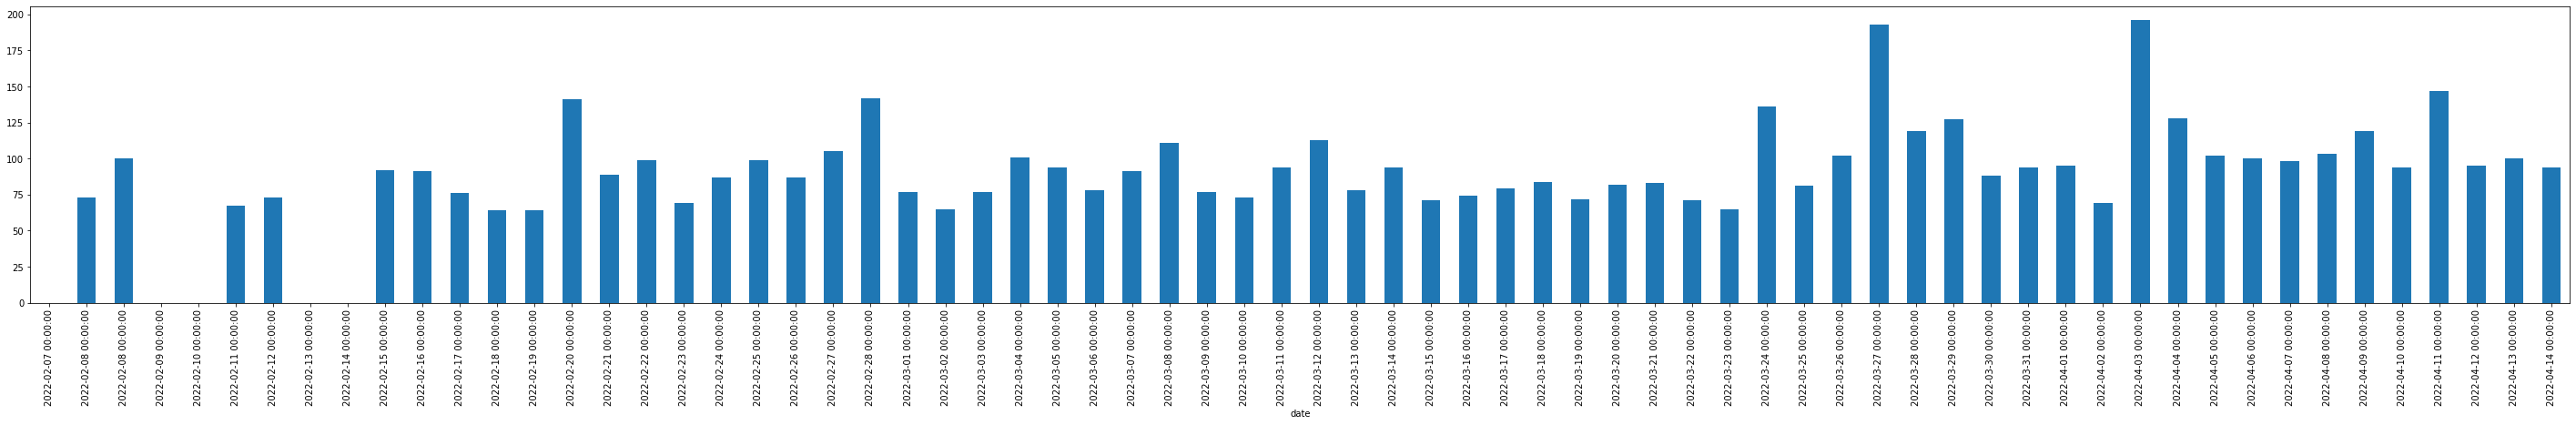

In [61]:
plt.figure(figsize=(50, 6))
table["diff"].plot.bar()